In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import KMeans

In [2]:
def expand(a,b):
    d=(b-a)*0.1
    return a-d,b+d

In [8]:
N = 400
centers = 4
data, y = ds.make_blobs(N, n_features=2, centers=centers, random_state=2)
data2, y2 = ds.make_blobs(N,
                          n_features=2,
                          centers=centers,
                          cluster_std=(1, 2.5, 0.5, 2),
                          random_state=2)
data3 = np.vstack(
    (data[y == 0][:], data[y == 1][:50], data[y == 2][:20], 
     data[y == 3][:5]))
y3 = np.array([0] * 100 + [1] * 50 + [2] * 20 + [3] * 5)

In [9]:
cls=KMeans(n_clusters=4,init='k-means++')
y_hat=cls.fit_predict(data)
y2_hat=cls.fit_predict(data2)
y3_hat=cls.fit_predict(data3)

In [29]:
m=np.array(((1,1),(1,3)))
data_r=data.dot(m)
y_r_hat=cls.fit_predict(data_r)

In [30]:
cm=matplotlib.colors.ListedColormap(list('rgbm'))

In [48]:
np.min(data,axis=0)

array([ -8.09999402, -11.82507855])

In [44]:
np.where(data<=-11.82507855)

(array([174], dtype=int64), array([1], dtype=int64))

In [45]:
data[174]

array([ -0.10657046, -11.82507855])

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


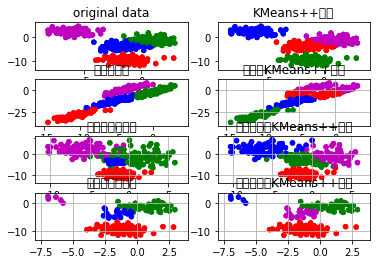

In [50]:
plt.subplot(421)
plt.title('original data')
plt.scatter(data[:,0],data[:,1],c=y,s=30,cmap=cm,edgecolors='none')
x1_min,x2_min=np.min(data,axis=0)
x1_max,x2_max=np.max(data,axis=0)
x1_min,x1_max=expand(x1_min,x1_max)
x2_min,x2_max=expand(x2_min,x2_max)
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))

plt.subplot(422)
plt.title(u'KMeans++聚类')
plt.scatter(data[:, 0], data[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))

plt.subplot(423)
plt.title(u'旋转后数据')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data_r, axis=0)
x1_max, x2_max = np.max(data_r, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))

plt.subplot(424)
plt.title(u'旋转后KMeans++聚类')
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(425)
plt.title(u'方差不相等数据')
plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data2, axis=0)
x1_max, x2_max = np.max(data2, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(426)
plt.title(u'方差不相等KMeans++聚类')
plt.scatter(data2[:, 0], data2[:, 1], c=y2_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(427)
plt.title(u'数量不相等数据')
plt.scatter(data3[:, 0], data3[:, 1], s=30, c=y3, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data3, axis=0)
x1_max, x2_max = np.max(data3, axis=0)
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)

plt.subplot(428)
plt.title(u'数量不相等KMeans++聚类')
plt.scatter(data3[:, 0], data3[:, 1], c=y3_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(True)
plt.show()